# Preparativos

Primero cargamos los datos y los guardamos en una variable secundaria, cosa que no tengamos que volverlos a cargar

In [83]:
import pandas as pd
import numpy as np
import datetime
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os.path as path

In [84]:
camino_tender_2018 = path.join("Datos y trabajo con muestras",'tenderers_2018.xlsx')
df_tenderer_2018 = pd.read_excel(camino_tender_2018)
camino_tenderer_2021 = path.join("Datos y trabajo con muestras",'tenderers_2021.xlsx')
df_tenderer_2021 = pd.read_excel(camino_tenderer_2021)


In [85]:
camino_award_2018 = path.join("Datos y trabajo con muestras",'awards_2018.xlsx')
df_award_2018 =pd.read_excel(camino_award_2018)
camino_award_2021 = path.join("Datos y trabajo con muestras",'awards_2021.xlsx')
df_award_2021 = pd.read_excel(camino_award_2021)

In [86]:
df_award_2018["procurementMethod"] =df_award_2018["procurementMethod"].astype("category")
df_award_2018["tender_status"] =df_award_2018["tender_status"].astype("category")
df_award_2018["initiationType"] =df_award_2018["initiationType"].astype("category")
df_award_2018["buyer_region"] =df_award_2018["buyer_region"].astype("category")

In [87]:
df_award_2021.drop(columns=["_link_y", "_link_main_x"], inplace=True)

In [88]:
df_award_2021["procurementMethod"] =df_award_2021["procurementMethod"].astype("category")
df_award_2021["tender_status"] =df_award_2021["tender_status"].astype("category")
df_award_2021["initiationType"] =df_award_2021["initiationType"].astype("category")
df_award_2021["buyer_region"] =df_award_2021["buyer_region"].astype("category")

In [89]:
df_tenderer_2018["procurementMethod"] =df_tenderer_2018["procurementMethod"].astype("category")
df_tenderer_2018["sector"] =df_tenderer_2018["sector"].astype("category")
df_tenderer_2018["tender_status"] =df_tenderer_2018["tender_status"].astype("category")
df_tenderer_2018["procurement_details"] =df_tenderer_2018["procurement_details"].astype("category")
df_tenderer_2018["initiationType"] =df_tenderer_2018["initiationType"].astype("category")

In [90]:
df_tenderer_2021["procurementMethod"] =df_tenderer_2021["procurementMethod"].astype("category")
df_tenderer_2021["sector"] =df_tenderer_2021["sector"].astype("category")
df_tenderer_2021["tender_status"] =df_tenderer_2021["tender_status"].astype("category")
df_tenderer_2021["procurement_details"] =df_tenderer_2021["procurement_details"].astype("category")
df_tenderer_2021["initiationType"] =df_tenderer_2021["initiationType"].astype("category")

In [91]:
award_2018 =df_award_2018
award_2021 = df_award_2021
tenderer_2018 = df_tenderer_2018
tenderer_2021 = df_tenderer_2021

# Preguntas

1.- ¿Existe una correlación entre el monto adjudicado y el tipo de procedimiento de licitación utilizado?

2.- ¿Hay factores que afectan la cantidad de oferentes en una licitación?, ¿Cuáles son?

3.- ¿Qué tipo de servicio estatal tiene mejor respuesta del mercado frente a sus licitaciones?

4.- ¿Qué tipo de area estatal muestran similitudes en cuanto a montos y cantidad de ofertas de las licitaciones que realiza?

5.- ¿Cómo se distribuyen geográficamente las contrataciones públicas según el tipo de licitación?

### Primera pregunta.

Para responder esta pregunta se debe usarán los dataframes awards, la columna "procurementMethod" como tipo de procedimiento de licitación, no se utilizará "procurement_details" puesto que esta columna tiene una directa relación con el monto adjudicado, como monto se utilizará "value_amount" de las licitaciones en CLP, para ver si existe una relción entre ambos valores se procederá a realizar pairplots.

In [92]:
df_p1_2018 = award_2018[["procurementMethod", "value_amount", "value_monetary_unit"]]
df_p1_2018 = df_p1_2018.loc[df_p1_2018["value_monetary_unit"] == "CLP"]
df_p1_2018.dropna(inplace=True)
dummy_2018 = pd.get_dummies(df_p1_2018["procurementMethod"])
dummy_2018 = dummy_2018.map(lambda x: 0 if x == True else 1)
df_p1_2018 = pd.concat([df_p1_2018, dummy_2018], axis=1)
df_p1_2018["value_amount"] = df_p1_2018["value_amount"].map(lambda x: round(x))
df_p1_2018.drop(columns=["value_monetary_unit"], inplace=True)

In [93]:
df_p1_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19709 entries, 0 to 24742
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   procurementMethod  19709 non-null  category
 1   value_amount       19709 non-null  int64   
 2   open               19709 non-null  int64   
 3   selective          19709 non-null  int64   
dtypes: category(1), int64(3)
memory usage: 635.3 KB


In [94]:
promedio_18 = df_p1_2018["open"].mean()
covarianza_18 = df_p1_2018["value_amount"].cov(df_p1_2018["open"])

In [95]:
df_p1_2018["value_norm"] = (df_p1_2018["value_amount"] - promedio_18)/covarianza_18

<Axes: xlabel='value_norm', ylabel='open'>

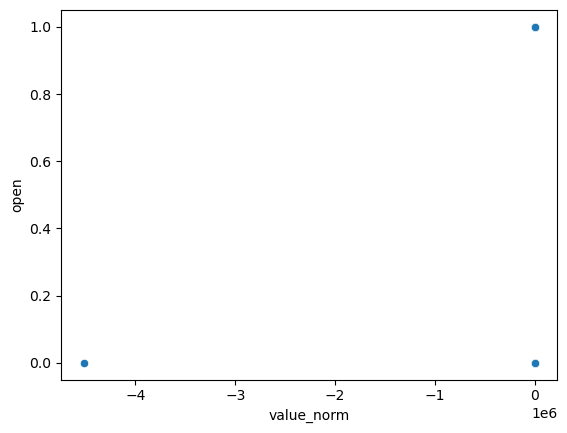

In [96]:
sns.scatterplot(df_p1_2018, y="open", x="value_norm")

In [97]:
df_p1_2021 = award_2021[["procurementMethod", "value_amount", "value_monetary_unit"]]
df_p1_2021 = df_p1_2021.loc[df_p1_2021["value_monetary_unit"] == "CLP"]
df_p1_2021 = df_p1_2021.dropna(subset=["value_amount"])
dummy_2021 = pd.get_dummies(df_p1_2021["procurementMethod"])
dummy_2021 = dummy_2021.map(lambda x: 0 if x == True else 1)
df_p1_2021 = pd.concat([df_p1_2021, dummy_2021], axis=1)
df_p1_2021["value_amount"] = df_p1_2021["value_amount"].map(lambda x: round(x))
df_p1_2021.drop(columns=["value_monetary_unit"], inplace=True)

In [98]:
promedio_21 = df_p1_2021["open"].mean()
covarianza_21 = df_p1_2021["value_amount"].cov(df_p1_2021["open"])

In [99]:
df_p1_2021["value_norm"] = (df_p1_2021["value_amount"] - promedio_21)/covarianza_21

<Axes: xlabel='value_norm', ylabel='open'>

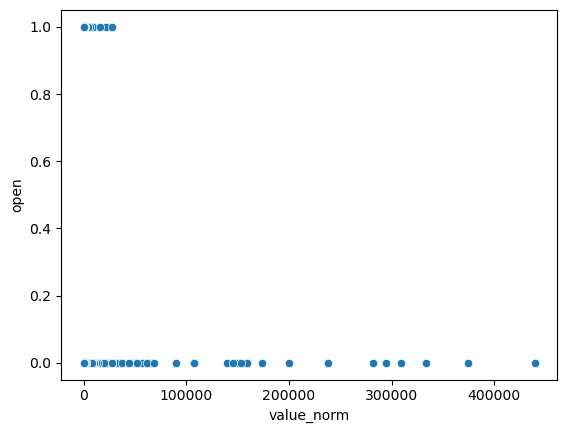

In [100]:
sns.scatterplot(df_p1_2021, y="open", x="value_norm")

##### Respuesta: No parece existir relación entre la cantidad de dinero adjudicado y el metodo de licitación usado.

### Segunda pregunta

Para responder a esta pregunta haremos un pair plot para cada variable de los dataframes awards y tenderers, exceptuando las que están relacionadas con que hayan tenderers, las columnas comunes entre los dataframe que se utilizarán solo una vez, las columnas identificatorias, las de items y las que están relacionadas entre si (se dejará una, la causa), y observaremos si hay alguna relación tentativa, en base a estas observaciones crearemos una matríz de correlación que graficaremos en un heatmap y teniendo esta información intentaremos plantear un predictor de duración de licitaciones.

#### 2018

In [101]:
award_2018.columns

Index(['_link_x', 'initiationType', 'tender_id', 'procurement_details',
       'tender_status', 'procurementMethod', 'tender_hasEnquiries',
       'tender_awardPeriod_endDate', 'tender_awardPeriod_startDate',
       'tender_awardPeriod_durationInDays', 'tender_tenderPeriod_endDate',
       'tender_tenderPeriod_startDate', 'tender_tenderPeriod_durationInDays',
       'tender_enquiryPeriod_endDate', 'tender_enquiryPeriod_startDate',
       'tender_enquiryPeriod_durationInDays', 'estimated_cost',
       'estimated_cost_monetary_unit', 'buyer_id', 'buyer_name',
       'buyer_region', 'identifier_id', 'buyer_legalName', 'sector',
       'Codigo Unidad de Compra', 'Unidad de Compra', '_link_y',
       '_link_main_x', 'date', 'status', 'value_amount', 'value_monetary_unit',
       'id', 'quantity', 'unit_name', 'unit_value_amount', 'classification_id',
       'unit_value_monetary_unit', 'Nombre Segmento', 'Código Producto',
       'Nombre Producto'],
      dtype='object')

In [102]:
df_cant_tenderers_18 = df_tenderer_2018.groupby("tender_id").agg({"Has_tender":"sum"}).reset_index()
df_cant_tenderers_18

,tender_id,Has_tender
0,1000-48-LE17,1
1,1000-52-LQ17,0
2,1000-54-LE17,4
3,1000-55-LE17,3
4,1000-56-LE17,2
...,...,...
11470,998-89-LE17,5
11471,998-91-LE17,4
11472,998-95-LP17,0
11473,998-97-LP17,1


In [103]:
df__2018 = award_2018[['initiationType', 'tender_id', 'procurement_details','tender_tenderPeriod_endDate','tender_tenderPeriod_startDate','procurementMethod', 'estimated_cost','estimated_cost_monetary_unit', 'sector','value_amount']]

In [104]:
dic_regiones ={'Región de Valparaíso ': 5,'Región del Biobío ':8, 'Región Metropolitana de Santiago':13,'Región de los Lagos ':10,'Región de Arica y Parinacota':15,'Región de Magallanes y de la Antártica':12, 'Región del Maule ':7,'Región de Los Ríos':14,'Región de la Araucanía ':9,'Región del Libertador General Bernardo O´Higgins':6,'Región de Atacama ':3,'Región de Tarapacá  ':1,'Región Aysén del General Carlos Ibáñez del Campo':11,
                           'Región de Antofagasta ':2,'Región de Coquimbo ':4}

In [105]:
df__2018 = df__2018.loc[df__2018["estimated_cost_monetary_unit"] =="CLP"]

In [106]:
df__2018["numero_region"] = award_2018["buyer_region"].map(dic_regiones)

In [107]:
dummy_2018 = pd.get_dummies(df__2018["procurementMethod"])
dummy_2018= dummy_2018.map(lambda x: 0 if x == True else 1)
df__2018 = pd.concat([df__2018, dummy_2018], axis=1)

In [108]:
df__2018

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective
1,tender,2409-1129-L117,L1,2017-12-26 15:30:00,2017-12-18 17:58:24,open,300000.0,CLP,MUNICIPALIDADES,NaN,8,0,1
2,tender,2961-811-L117,L1,2018-01-02 17:00:00,2017-12-19 13:02:43,open,1452000.0,CLP,MUNICIPALIDADES,870000.0,13,0,1
3,tender,4858-195-L117,L1,2017-12-21 10:02:00,2017-12-15 12:23:25,open,900000.0,CLP,MUNICIPALIDADES,NaN,8,0,1
4,tender,2409-975-LE17,LE,2017-12-11 16:00:00,2017-12-05 17:11:36,open,6000000.0,CLP,MUNICIPALIDADES,6000000.0,8,0,1
12,tender,2098-173-LE17,LE,2017-12-26 15:31:00,2017-12-19 15:56:25,open,16558612.0,CLP,SALUD,12219604.0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24714,tender,3759-302-L117,L1,2017-11-13 15:00:00,2017-11-06 15:19:50,open,800000.0,CLP,MUNICIPALIDADES,448950.0,7,0,1
24715,tender,3759-302-L117,L1,2017-11-13 15:00:00,2017-11-06 15:19:50,open,800000.0,CLP,MUNICIPALIDADES,448950.0,7,0,1
24716,tender,3759-302-L117,L1,2017-11-13 15:00:00,2017-11-06 15:19:50,open,800000.0,CLP,MUNICIPALIDADES,448950.0,7,0,1
24718,tender,2583-726-L117,L1,2017-11-29 15:01:00,2017-11-21 16:44:00,open,4460000.0,CLP,MUNICIPALIDADES,3723000.0,13,0,1


In [109]:
df__2018["mes_comiezo"] = df__2018["tender_tenderPeriod_startDate"].map(lambda x: x.month)
df__2018["dia_comiezo"] = df__2018["tender_tenderPeriod_startDate"].map(lambda x: x.day)
df__2018["mes_fin"] = df__2018["tender_tenderPeriod_endDate"].map(lambda x: x.month)
df__2018["mes_fin"] = df__2018["tender_tenderPeriod_endDate"].map(lambda x: x.day)

In [110]:
df__2018 = df__2018.merge(df_cant_tenderers_18, on="tender_id")

In [111]:
df__2018.drop_duplicates(keep="first", inplace=True)

In [112]:
df__2018["tender_id"].count()

5089

In [113]:
df__2018["sector"].unique()

array(['MUNICIPALIDADES', 'SALUD', 'GOB. CENTRAL, UNIVERSIDADES', 'FFAA',
       'OBRAS P�BLICAS', 'LEGISLATIVO Y JUDICIAL'], dtype=object)

In [114]:
df__2018["sector"] = df__2018["sector"].map({'MUNICIPALIDADES':1, 'SALUD':3, 'GOB. CENTRAL':4, 'UNIVERSIDADES':5, 'FFAA':6,'OBRAS P�BLICAS':7, 'LEGISLATIVO Y JUDICIAL':8, 'OTROS':10})

In [115]:
df__2018["procurement_details"].unique()

array(['L1', 'LE', 'LP', 'LR', 'LQ', nan, 'H2', 'B2', 'LS'], dtype=object)

In [116]:
dic_procurement = {'L1':0, 'LE':1, 'LP':2, 'LR':3, 'LQ':4,'B2':5, 'H2':6, 'LS':7}

In [117]:
df__2018["procurement_details"] = df__2018["procurement_details"].map(dic_procurement)

In [118]:
df__2018.head()

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective,mes_comiezo,dia_comiezo,mes_fin,Has_tender
0,tender,2409-1129-L117,0.0,2017-12-26 15:30:00,2017-12-18 17:58:24,open,300000.0,CLP,1.0,NaN,8,0,1,12,18,26,0
1,tender,2961-811-L117,0.0,2018-01-02 17:00:00,2017-12-19 13:02:43,open,1452000.0,CLP,1.0,870000.0,13,0,1,12,19,2,4
2,tender,4858-195-L117,0.0,2017-12-21 10:02:00,2017-12-15 12:23:25,open,900000.0,CLP,1.0,NaN,8,0,1,12,15,21,1
3,tender,2409-975-LE17,1.0,2017-12-11 16:00:00,2017-12-05 17:11:36,open,6000000.0,CLP,1.0,6000000.0,8,0,1,12,5,11,1
4,tender,2098-173-LE17,1.0,2017-12-26 15:31:00,2017-12-19 15:56:25,open,16558612.0,CLP,3.0,12219604.0,8,0,1,12,19,26,15


In [119]:
df__2018.drop(columns=['tender_tenderPeriod_endDate','tender_tenderPeriod_startDate', "tender_id", "initiationType","estimated_cost_monetary_unit","procurementMethod", "initiationType"], inplace=True)

In [120]:
correlacion_18 = df__2018.corr()

<Axes: >

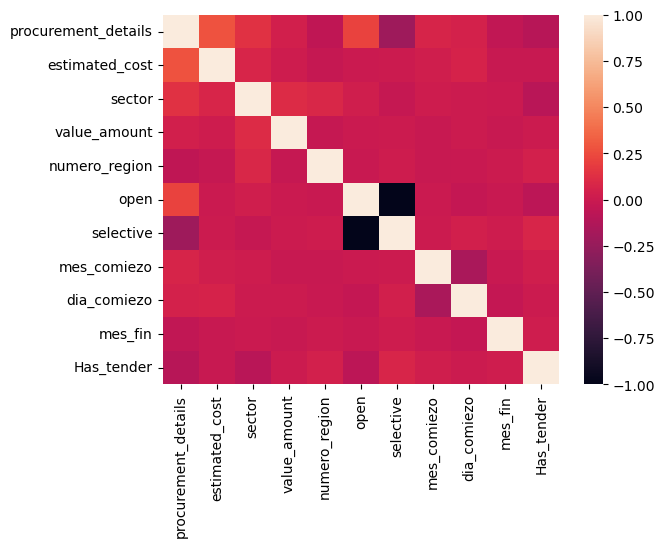

In [121]:
sns.heatmap(correlacion_18)

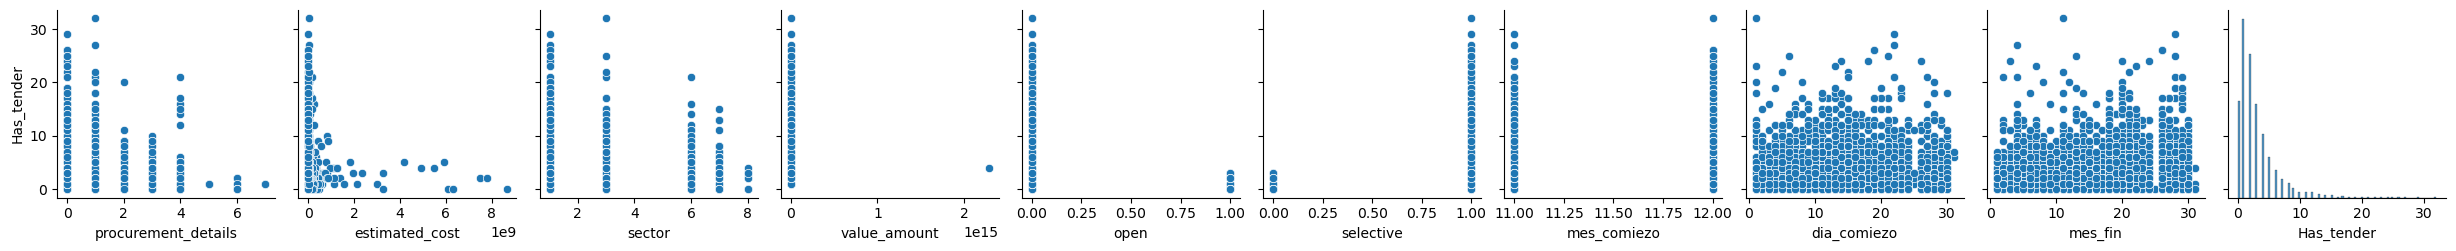

In [122]:
sns.pairplot(df__2018, y_vars="Has_tender")

#### 2021

In [123]:
award_2021.columns

Index(['_link_x', 'tender_id', 'initiationType', 'tender_id.1',
       'procurement_details', 'tender_status', 'procurementMethod',
       'tender_hasEnquiries', 'tender_awardPeriod_endDate',
       'tender_awardPeriod_startDate', 'tender_awardPeriod_durationInDays',
       'tender_tenderPeriod_endDate', 'tender_tenderPeriod_startDate',
       'tender_tenderPeriod_durationInDays', 'tender_enquiryPeriod_endDate',
       'tender_enquiryPeriod_startDate', 'tender_enquiryPeriod_durationInDays',
       'estimated_cost', 'buyer_name', 'estimated_cost_monetary_unit',
       'buyer_id', 'buyer_name.1', 'buyer_region', 'identifier_id',
       'buyer_legalName', 'sector', 'Codigo Unidad de Compra',
       'Unidad de Compra', 'date', 'status', 'value_amount',
       'value_monetary_unit', 'id', 'quantity', 'unit_name',
       'unit_value_amount', 'classification_id', 'unit_value_monetary_unit',
       'Nombre Segmento', 'Código Producto', 'Nombre Producto'],
      dtype='object')

In [124]:
df_cant_tenderers_21 = df_tenderer_2021.groupby("tender_id").agg({"Has_tender":"sum"}).reset_index()
df_cant_tenderers_21

,tender_id,Has_tender
0,ocds-70d2nz-1000-35-CO21-2021-11-23T15:09:24Z,2
1,ocds-70d2nz-1000-36-CO21-2021-11-23T15:43:28Z,2
2,ocds-70d2nz-1000-37-CO21-2021-11-29T17:13:39Z,2
3,ocds-70d2nz-1000-38-CO21-2021-11-23T15:32:02Z,1
4,ocds-70d2nz-1000-39-CO21-2021-11-23T15:19:53Z,2
...,...,...
16554,ocds-70d2nz-999-81-LE21-2021-12-06T18:05:28Z,0
16555,ocds-70d2nz-999-82-LE21-2021-12-15T16:26:54Z,2
16556,ocds-70d2nz-999-83-LE21-2021-12-24T11:55:27Z,0
16557,ocds-70d2nz-999-84-LE21-2021-12-29T12:57:17Z,2


In [125]:
df__2021 = award_2021[['initiationType', 'tender_id', 'procurement_details','tender_tenderPeriod_endDate','tender_tenderPeriod_startDate','procurementMethod', 'estimated_cost','estimated_cost_monetary_unit', 'sector','value_amount']]

In [126]:
dic_regiones ={'Región de Valparaíso ': 5,'Región del Biobío ':8, 'Región Metropolitana de Santiago':13,'Región de los Lagos ':10,'Región de Arica y Parinacota':15,'Región de Magallanes y de la Antártica':12, 'Región del Maule ':7,'Región de Los Ríos':14,'Región de la Araucanía ':9,'Región del Libertador General Bernardo O´Higgins':6,'Región de Atacama ':3,'Región de Tarapacá  ':1,'Región Aysén del General Carlos Ibáñez del Campo':11,
                           'Región de Antofagasta ':2,'Región de Coquimbo ':4}

In [127]:
df__2021 = df__2021.loc[df__2021["estimated_cost_monetary_unit"] =="CLP"]

In [128]:
df__2021["numero_region"] = award_2021["buyer_region"].map(dic_regiones)

In [129]:
dummy_2021 = pd.get_dummies(df__2021["procurementMethod"])
dummy_2021= dummy_2021.map(lambda x: 0 if x == True else 1)
df__2021 = pd.concat([df__2021, dummy_2021], axis=1)

In [130]:
df__2021

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective
0,tender,ocds-70d2nz-1079639-135-L121-2021-12-27T17:31:16Z,L1,2021-12-07 15:00:00,2021-12-02 19:30:51,open,5000000.0,CLP,FFAA,NaN,10.0,0,1
2,tender,ocds-70d2nz-4993-132-L121-2021-12-22T17:49:37Z,L1,2021-12-15 15:40:00,2021-12-09 13:55:02,open,500200.0,CLP,MUNICIPALIDADES,NaN,9.0,0,1
4,tender,ocds-70d2nz-780724-18-LE21-2021-12-22T18:09:39Z,LE,2021-12-20 15:00:00,2021-12-10 15:52:15,open,33000000.0,CLP,LEGISLATIVO Y JUDICIAL,890400.0,14.0,0,1
5,tender,ocds-70d2nz-4858-116-L121-2021-12-16T15:15:56Z,L1,2021-12-09 15:00:00,2021-12-03 15:17:45,open,1873290.0,CLP,MUNICIPALIDADES,1512605.0,5.0,0,1
6,tender,ocds-70d2nz-4858-116-L121-2021-12-16T15:15:56Z,L1,2021-12-09 15:00:00,2021-12-03 15:17:45,open,1873290.0,CLP,MUNICIPALIDADES,1512605.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,tender,ocds-70d2nz-3246-115-L121-2021-12-03T08:59:24Z,L1,2021-11-18 10:00:00,2021-11-10 16:42:56,open,2940000.0,CLP,FFAA,NaN,2.0,0,1
30653,tender,ocds-70d2nz-834259-28-LQ21-2021-12-29T18:44:07Z,LQ,2021-12-09 15:01:00,2021-11-18 15:40:05,open,225000000.0,CLP,MUNICIPALIDADES,NaN,7.0,0,1
30654,tender,ocds-70d2nz-3019-101-LE21-2021-12-03T15:23:34Z,LE,2021-11-19 18:49:00,2021-11-09 15:16:55,open,26410000.0,CLP,MUNICIPALIDADES,NaN,8.0,0,1
30655,tender,ocds-70d2nz-858-127-L121-2021-12-09T13:21:48Z,L1,2021-11-29 15:01:00,2021-11-18 20:36:00,open,3950000.0,CLP,"GOB. CENTRAL, UNIVERSIDADES",NaN,13.0,0,1


In [131]:
df__2021["mes_comiezo"] = df__2021["tender_tenderPeriod_startDate"].map(lambda x: x.month)
df__2021["dia_comiezo"] = df__2021["tender_tenderPeriod_startDate"].map(lambda x: x.day)
df__2021["mes_fin"] = df__2021["tender_tenderPeriod_endDate"].map(lambda x: x.month)
df__2021["mes_fin"] = df__2021["tender_tenderPeriod_endDate"].map(lambda x: x.day)

In [132]:
df__2021 = df__2021.merge(df_cant_tenderers_21, on="tender_id")

In [133]:
df__2021.drop_duplicates(keep="first", inplace=True)

In [134]:
df__2021["tender_id"].count()

9081

In [135]:
df__2021["sector"].unique()

array(['FFAA', 'MUNICIPALIDADES', 'LEGISLATIVO Y JUDICIAL', 'SALUD',
       'GOB. CENTRAL, UNIVERSIDADES', 'OBRAS P�BLICAS', 'OTROS'],
      dtype=object)

In [136]:
df__2021["sector"] = df__2021["sector"].map({'MUNICIPALIDADES':1, 'SALUD':3, 'GOB. CENTRAL':4, 'UNIVERSIDADES':5, 'FFAA':6,'OBRAS P�BLICAS':7, 'LEGISLATIVO Y JUDICIAL':8, 'OTROS':10})

In [137]:
df__2021["procurement_details"].unique()

array(['L1', 'LE', 'LQ', 'LP', nan, 'LR', 'B2', 'H2'], dtype=object)

In [138]:
dic_procurement = {'L1':0, 'LE':1, 'LP':2, 'LR':3, 'LQ':4,'B2':5, 'H2':6, 'LS':7}

In [139]:
df__2021["procurement_details"] = df__2021["procurement_details"].map(dic_procurement)

In [140]:
df__2021.head()

,initiationType,tender_id,procurement_details,tender_tenderPeriod_endDate,tender_tenderPeriod_startDate,procurementMethod,estimated_cost,estimated_cost_monetary_unit,sector,value_amount,numero_region,open,selective,mes_comiezo,dia_comiezo,mes_fin,Has_tender
0,tender,ocds-70d2nz-1079639-135-L121-2021-12-27T17:31:16Z,0.0,2021-12-07 15:00:00,2021-12-02 19:30:51,open,5000000.0,CLP,6.0,NaN,10.0,0,1,12,2,7,1
1,tender,ocds-70d2nz-4993-132-L121-2021-12-22T17:49:37Z,0.0,2021-12-15 15:40:00,2021-12-09 13:55:02,open,500200.0,CLP,1.0,NaN,9.0,0,1,12,9,15,2
2,tender,ocds-70d2nz-780724-18-LE21-2021-12-22T18:09:39Z,1.0,2021-12-20 15:00:00,2021-12-10 15:52:15,open,33000000.0,CLP,8.0,890400.0,14.0,0,1,12,10,20,4
3,tender,ocds-70d2nz-4858-116-L121-2021-12-16T15:15:56Z,0.0,2021-12-09 15:00:00,2021-12-03 15:17:45,open,1873290.0,CLP,1.0,1512605.0,5.0,0,1,12,3,9,1
8,tender,ocds-70d2nz-1057532-111-L121-2021-12-15T12:42:49Z,0.0,2021-12-06 15:00:00,2021-12-01 14:05:38,open,2500000.0,CLP,3.0,NaN,7.0,0,1,12,1,6,0


In [141]:
df__2021.drop(columns=['tender_tenderPeriod_endDate','tender_tenderPeriod_startDate', "tender_id", "initiationType","estimated_cost_monetary_unit","procurementMethod", "initiationType"], inplace=True)

In [142]:
correlacion_21 = df__2021.corr()

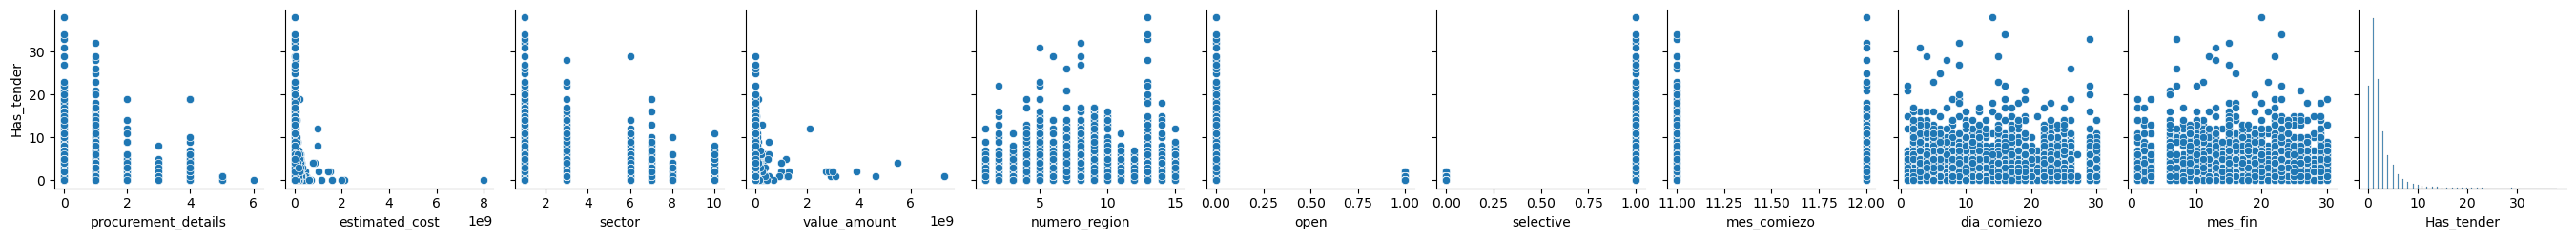

In [143]:
sns.pairplot(df__2021, y_vars="Has_tender")

### Tercera Pregunta

Para responder esta pregunta se usara la información de tenderers, como valor de servicio estatal se utilizará la columna "sector" y como indicador de respuesta del mercado, la cantidad de tenderers "Has_tender" y la cantidad de suppliers "is_supplier" ,la cantidad de licitaciones del tipo selective en "procurementMethod" y el tipo en "procurement_details", puesto que según el reglamento de la ley 19886 articulo 10, las licitaciones de tipo privada/selective ocurren cuando no sepresentan concursantes al llamado de licitación pública/open, se utilizarán countplots y tablas de datos agrupados para cada valor a revisarse, se revisaran los valores para cada año, y se buscará establecer una generalidad para ambos, en caso de no ser posible se entregarán respuestas por cada año.

### Cuarta Pregunta

Se utilizarán la columna "sector", para determinar el área estatal de cada licitación, "tender_tenderPeriod_startDate" para la fecha de inicio de la licitación y "value_amount" como monto, se utilizará groupby y counplots/barplots para revisar patrones, se buscará plantear una respuesta general para los años revisados, en caso de no ser posible se dará una respuesta para cada año y un contraste entre los patrones.

#### 2018

In [144]:
award_2018.head(7)

,_link_x,initiationType,tender_id,procurement_details,tender_status,procurementMethod,tender_hasEnquiries,tender_awardPeriod_endDate,tender_awardPeriod_startDate,tender_awardPeriod_durationInDays,...,value_monetary_unit,id,quantity,unit_name,unit_value_amount,classification_id,unit_value_monetary_unit,Nombre Segmento,Código Producto,Nombre Producto
0,id-0.0,tender,4548-142-L117,L1,complete,open,False,2017-12-15 18:05:00,2017-12-13 09:03:00,2.376389,...,CLP,36425198.0,1.0,Unidad,690000.0,60141012.0,CLP,"Instrumentos Musicales, Juegos, Juguetes, Arte...",60141012.0,Juguetes inflables
1,id-0.1,tender,2409-1129-L117,L1,unsuccessful,open,False,2018-01-25 11:35:00,2017-12-26 15:31:00,29.836111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id-0.2,tender,2961-811-L117,L1,complete,open,False,2018-02-02 19:38:00,2018-01-02 17:00:00,31.109722,...,CLP,36451829.0,1.0,Unidad,870000.0,30171501.0,CLP,"Componentes y Suministros para Estructuras, Ed...",30171501.0,Puertas de cristal
3,id-0.3,tender,4858-195-L117,L1,unsuccessful,open,False,2017-12-26 15:53:00,2017-12-21 10:03:00,5.243056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id-0.4,tender,2409-975-LE17,LE,complete,open,True,2017-12-14 16:55:00,2017-12-11 16:30:00,3.017361,...,CLP,36342031.0,1.0,Unidad,6000000.0,86141501.0,CLP,Servicios Educativos y de Formación,86141501.0,Servicios de asesorías educativas
5,id-0.5,tender,4834-32-L117,L1,complete,open,True,2017-12-29 16:00:00,2017-12-28 12:02:00,1.165278,...,CLP,36460630.0,4.0,Unidad,4995.0,30102201.0,CLP,"Componentes y Suministros para Estructuras, Ed...",30102201.0,Placa de aleación ferrosa
6,id-0.5,tender,4834-32-L117,L1,complete,open,True,2017-12-29 16:00:00,2017-12-28 12:02:00,1.165278,...,CLP,36460632.0,4.0,Kit,4538.0,49161604.0,CLP,"Equipos, Suministros y Accesorios para Deporte...",49161604.0,Pelotas de tenis


In [145]:
award_2018.columns

Index(['_link_x', 'initiationType', 'tender_id', 'procurement_details',
       'tender_status', 'procurementMethod', 'tender_hasEnquiries',
       'tender_awardPeriod_endDate', 'tender_awardPeriod_startDate',
       'tender_awardPeriod_durationInDays', 'tender_tenderPeriod_endDate',
       'tender_tenderPeriod_startDate', 'tender_tenderPeriod_durationInDays',
       'tender_enquiryPeriod_endDate', 'tender_enquiryPeriod_startDate',
       'tender_enquiryPeriod_durationInDays', 'estimated_cost',
       'estimated_cost_monetary_unit', 'buyer_id', 'buyer_name',
       'buyer_region', 'identifier_id', 'buyer_legalName', 'sector',
       'Codigo Unidad de Compra', 'Unidad de Compra', '_link_y',
       '_link_main_x', 'date', 'status', 'value_amount', 'value_monetary_unit',
       'id', 'quantity', 'unit_name', 'unit_value_amount', 'classification_id',
       'unit_value_monetary_unit', 'Nombre Segmento', 'Código Producto',
       'Nombre Producto'],
      dtype='object')

In [146]:
df_necesario_monto = award_2018[['tender_id', 'value_amount','unit_value_monetary_unit',"sector"]]
df_necesario_monto = df_necesario_monto.loc[df_necesario_monto['unit_value_monetary_unit'] == "CLP"]
df_necesario_monto.drop_duplicates(keep="first", inplace=True)
df_necesario_monto.dropna(inplace=True)

In [147]:
df_sector_2018_monto_total = df_necesario_monto.groupby(by="sector").agg({"value_amount":"sum"}).reset_index()
df_sector_2018_monto_total.rename(columns={"value_amount": "amount_total_2018"}, inplace=True)

In [148]:
df_sector_2018_monto_media = df_necesario_monto.groupby(by="sector").agg({"value_amount":"mean"}).reset_index()
df_sector_2018_monto_media.rename(columns={"value_amount": "amount_2018_media"}, inplace=True)

In [149]:
df_necesario_monto_21 = award_2021[['tender_id', 'value_amount','unit_value_monetary_unit',"sector"]]
df_necesario_monto_21 = df_necesario_monto_21.loc[df_necesario_monto_21['unit_value_monetary_unit'] == "CLP"]
df_necesario_monto_21.drop_duplicates(keep="first", inplace=True)
df_necesario_monto_21.dropna(inplace=True)

In [150]:
df_sector_2021_monto_total = df_necesario_monto_21.groupby(by="sector").agg({"value_amount":"sum"}).reset_index()
df_sector_2021_monto_total.rename(columns={"value_amount": "amount_total_2021"}, inplace=True)

In [151]:
df_sector_2021_monto_media = df_necesario_monto_21.groupby(by="sector").agg({"value_amount":"mean"}).reset_index()
df_sector_2021_monto_media.rename(columns={"value_amount": "amount_2021_media"}, inplace=True)

In [152]:
df_monto_sector_media = df_sector_2018_monto_media.merge(df_sector_2021_monto_media, on="sector")
df_monto_sector_total = df_sector_2018_monto_total.merge(df_sector_2021_monto_total, on="sector")
df_sector_monto = df_monto_sector_media.merge(df_monto_sector_total, on="sector")
df_sector_monto["amount_2018_media"] = df_sector_monto["amount_2018_media"].astype("float")
df_sector_monto["amount_2021_media"] = df_sector_monto["amount_2021_media"].astype("float")
df_sector_monto["amount_total_2018"] = df_sector_monto["amount_total_2018"].astype("float")
df_sector_monto["amount_total_2021"] = df_sector_monto["amount_total_2021"].astype("float")

### Quinta pregunta

Se utilizarán datos de <https://www.bcn.cl/siit/mapas_vectoriales/index_html> para armar mapas de calor de la cantidad de licitaciones de los tipos presentes en <procurement_details> realizadas por región de Chile <buyer_region> según cada año y en conjunto.

In [153]:
import geopandas as gp

In [154]:
camino = path.join("Datos y trabajo con muestras", "regiones", "Regional.shp")
df_regiones = gp.read_file(camino, driver="SHP")

In [155]:
award_2018["procurement_details"].unique()

array(['L1', 'LE', 'LP', 'LR', 'LQ', nan, 'B2', 'H2', 'LS'], dtype=object)

In [156]:
award_2021["procurement_details"].unique()

array(['L1', 'LE', nan, 'LQ', 'LP', 'LR', 'B2', 'H2'], dtype=object)

In [157]:
award_2018["buyer_region"] = award_2018["buyer_region"].astype("string")

In [158]:
award_2018["buyer_region"].unique()

<StringArray>
[                           'Región de Valparaíso ',
                               'Región del Biobío ',
                 'Región Metropolitana de Santiago',
                             'Región de los Lagos ',
                     'Región de Arica y Parinacota',
           'Región de Magallanes y de la Antártica',
                                'Región del Maule ',
                               'Región de Los Ríos',
                          'Región de la Araucanía ',
 'Región del Libertador General Bernardo O´Higgins',
                               'Región de Atacama ',
                             'Región de Tarapacá  ',
 'Región Aysén del General Carlos Ibáñez del Campo',
                           'Región de Antofagasta ',
                              'Región de Coquimbo ',
                                               <NA>]
Length: 16, dtype: string

In [159]:
df_5_2018 = award_2018.dropna(subset=["procurement_details", "buyer_region"])
df_5_2021 = award_2021.dropna(subset=["procurement_details", "buyer_region"])
df_p5 = pd.concat([df_5_2018, df_5_2021])

In [160]:
df_L1 = df_p5.loc[df_p5["procurement_details"] == "L1"][["buyer_region"]]
df_L1["numero_region"] = df_L1["buyer_region"].map(dic_regiones)

df_LE = df_p5.loc[df_p5["procurement_details"] == "LE"][["buyer_region"]]
df_LE["numero_region"] = df_LE["buyer_region"].map(dic_regiones)

df_LP = df_p5.loc[df_p5["procurement_details"] == "LP"][["buyer_region"]]
df_LP["numero_region"] = df_LP["buyer_region"].map(dic_regiones)

df_LR = df_p5.loc[df_p5["procurement_details"] == "LR"][["buyer_region"]]
df_LR["numero_region"] = df_LR["buyer_region"].map(dic_regiones)

df_LQ = df_p5.loc[df_p5["procurement_details"] == "LQ"][["buyer_region"]]
df_LQ["numero_region"] = df_LQ["buyer_region"].map(dic_regiones)

df_B2 = df_p5.loc[df_p5["procurement_details"] == "B2"][["buyer_region"]]
df_B2["numero_region"] = df_B2["buyer_region"].map(dic_regiones)

df_H2 = df_p5.loc[df_p5["procurement_details"] == "H2"][["buyer_region"]]
df_H2["numero_region"] = df_H2["buyer_region"].map(dic_regiones)

df_LS = df_p5.loc[df_p5["procurement_details"] == "LS"][["buyer_region"]]
df_LS["numero_region"] = df_LS["buyer_region"].map(dic_regiones)

In [161]:
l1_reg = df_L1.groupby("numero_region").count().reset_index()
le_reg = df_LE.groupby("numero_region").count().reset_index()
lp_reg = df_LP.groupby("numero_region").count().reset_index()
lr_reg = df_LR.groupby("numero_region").count().reset_index()
lq_reg = df_LQ.groupby("numero_region").count().reset_index()
b2_reg = df_B2.groupby("numero_region").count().reset_index()
h2_reg= df_H2.groupby("numero_region").count().reset_index()
ls_reg= df_LS.groupby("numero_region").count().reset_index()

In [162]:
L1 = df_regiones.merge(l1_reg, right_on="numero_region", left_on="codregion", how="left")
LE= df_regiones.merge(le_reg, right_on="numero_region", left_on="codregion", how="left")
LP= df_regiones.merge(lp_reg, right_on="numero_region", left_on="codregion", how="left")
LR= df_regiones.merge(lr_reg, right_on="numero_region", left_on="codregion", how="left")
LQ = df_regiones.merge(lq_reg, right_on="numero_region", left_on="codregion", how="left")
B2= df_regiones.merge(b2_reg, right_on="numero_region", left_on="codregion", how="left")
H2= df_regiones.merge(h2_reg, right_on="numero_region", left_on="codregion", how="left")
LS = df_regiones.merge(ls_reg, right_on="numero_region", left_on="codregion", how="left")

<Axes: >

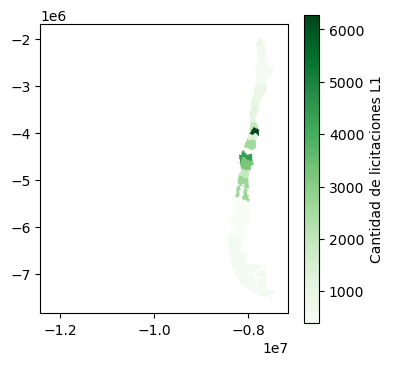

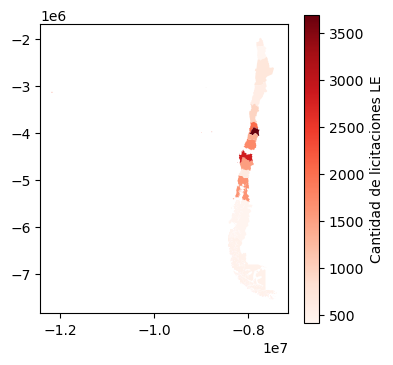

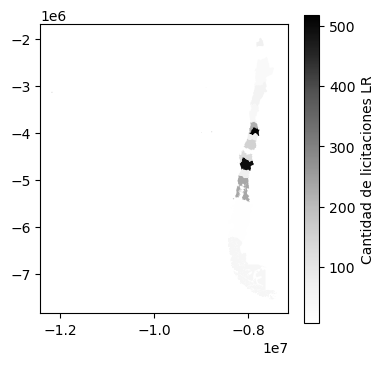

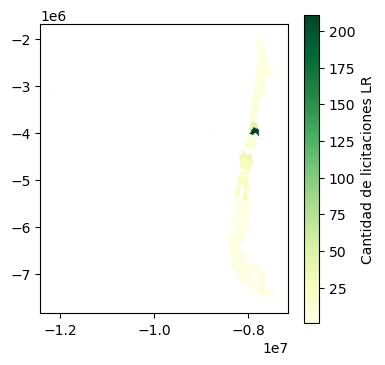

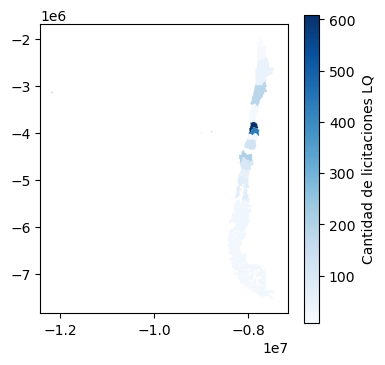

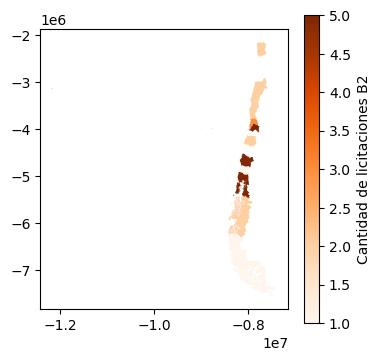

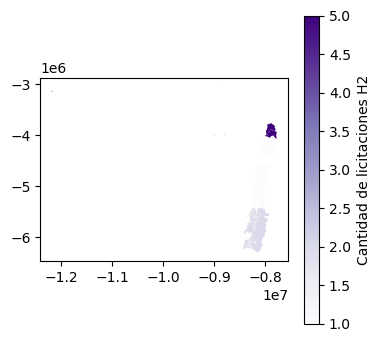

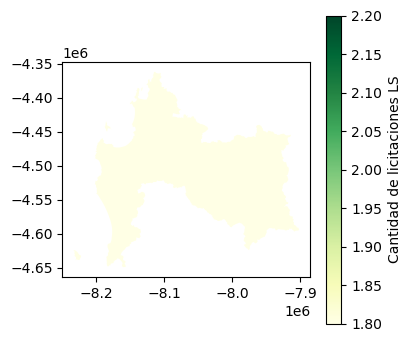

In [163]:

L1 = L1.set_index("objectid")
L1.plot(figsize=(4,4), column='buyer_region', cmap='Greens', legend=True, legend_kwds={"label": "Cantidad de licitaciones L1"})
LE = LE.set_index("objectid")
LE.plot(figsize=(4,4), column='buyer_region', cmap='Reds', legend=True,legend_kwds={"label": "Cantidad de licitaciones LE"})
LP = LP.set_index("objectid")
LP.plot(figsize=(4,4), column='buyer_region', cmap='Grays', legend=True, legend_kwds={"label": "Cantidad de licitaciones LR"})
LR = LR.set_index("objectid")
LR.plot(figsize=(4,4), column='buyer_region', cmap="YlGn", legend=True, legend_kwds={"label": "Cantidad de licitaciones LR"})
LQ = LQ.set_index("objectid")
LQ.plot(figsize=(4,4), column='buyer_region', cmap='Blues', legend=True, legend_kwds={"label": "Cantidad de licitaciones LQ"})
B2 = B2.set_index("objectid")
B2.plot(figsize=(4,4), column='buyer_region', cmap='Oranges', legend=True, legend_kwds={"label": "Cantidad de licitaciones B2"})
H2 = H2.set_index("objectid")
H2.plot(figsize=(4,4), column='buyer_region', cmap='Purples', legend=True, legend_kwds={"label": "Cantidad de licitaciones H2"})
LS = LS.set_index("objectid")
LS.plot(figsize=(4,4), column='buyer_region', cmap='YlGn', legend=True, legend_kwds={"label": "Cantidad de licitaciones LS"})
